## Estudos Base Corona Vírus do DataSUS

***

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

In [69]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### Análise Exploratória nos Dados

In [2]:
df = pd.read_csv('../datasets/arquivo_geral.csv', sep=';')

In [3]:
df.head(5)

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0


In [4]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

In [5]:
df.groupby('regiao').sum()['casosNovos'].reset_index().sort_values('casosNovos')

,regiao,casosNovos
0,Centro-Oeste,4278
4,Sul,7363
2,Norte,23207
1,Nordeste,45724
3,Sudeste,64756


### Visão de casos novos acumulados por semana

1. Acumulado semanal Brasil

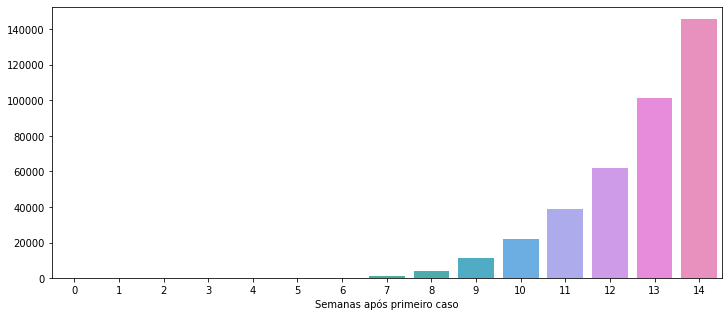

In [70]:
df_group_data = df.groupby(pd.Grouper(key='data', freq='W')).sum().reset_index()

df_group_data['casosNovosAcumulado'] = df_group_data['casosNovos'].cumsum()

fig, ax = plt.subplots(figsize=(12,5))
g = sn.barplot(x='data', y='casosNovosAcumulado', data=df_group_data) # , hue='regiao', ax=ax
g.set(xticklabels=list(range(len(df_group_data['data']))),
     xlabel='Semanas após primeiro caso', ylabel='')
plt.show()

2. Acumulado semanal Brasil por região

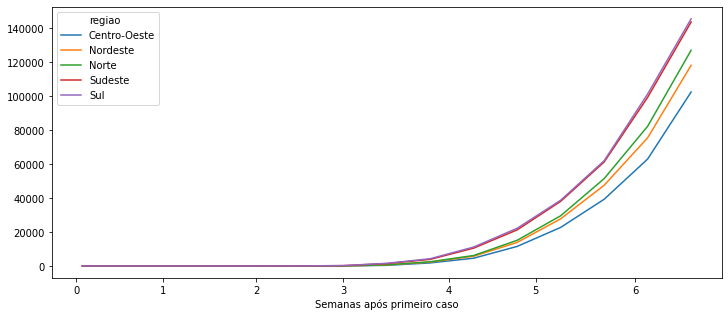

In [53]:
df_group_data = df.groupby([pd.Grouper(key='data', freq='W'), 'regiao']).sum().reset_index()

df_group_data['casosNovosAcumulado'] = df_group_data['casosNovos'].cumsum()

fig, ax = plt.subplots(figsize=(12,5))
g = sn.lineplot(x='data', y='casosNovosAcumulado', data=df_group_data, hue='regiao', ax=ax) 
g.set(xticklabels=list(range(len(df_group_data['data']))),
     xlabel='Semanas após primeiro caso', ylabel='')
plt.show()